## 📊 Step 8: Export Data to Excel

Export all generated data to Excel file with multiple sheets for analysis


# 🏥 SmartMediShop - AI Fraud Detection System

## Payment Management with Anomaly Detection

This notebook implements a complete AI-powered fraud detection system for SmartMediShop payment management.

### Features:
- Realistic transaction data generation
- Advanced feature engineering
- Multiple ML models (Isolation Forest + Random Forest)
- Model evaluation and optimization
- Real-time fraud detection

---


## 📊 Step 1: Import Required Libraries


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📅 Current time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


✅ All libraries imported successfully!
📅 Current time: 2025-11-02 14:18:43


## 🎯 Step 2: Transaction Data Generator Class


In [3]:
class SmartMediShopTransactionGenerator:
    """
    Advanced transaction data generator for SmartMediShop
    Creates realistic normal and fraudulent transaction patterns
    """
    
    def __init__(self):
        # Normal transaction patterns
        self.normal_patterns = {
            'amount_range': (10, 500),
            'business_hours': (9, 21),
            'transaction_frequency': (1, 5),
            'payment_methods': ['credit_card', 'debit_card', 'paypal', 'bank_transfer'],
            'device_types': ['desktop', 'mobile', 'tablet'],
            'countries': ['US', 'CA', 'UK', 'DE', 'FR']
        }
        
        # Fraudulent transaction patterns
        self.fraud_patterns = {
            'amount_range': (500, 10000),
            'odd_hours': [0, 1, 2, 3, 4, 5, 22, 23],
            'high_frequency': (10, 100),
            'suspicious_methods': ['credit_card', 'debit_card'],
            'suspicious_devices': ['mobile'],
            'suspicious_countries': ['FR', 'DE']  # International transactions
        }
    
    def generate_normal_transactions(self, count=2000):
        """Generate normal transaction patterns"""
        print(f"🔄 Generating {count} normal transactions...")
        
        transactions = []
        
        for i in range(count):
            # Normal user behavior patterns
            transaction = {
                'transaction_id': f'TXN_{i:06d}',
                'amount': np.random.lognormal(4, 1),  # Log-normal distribution
                'hour': np.random.choice(range(9, 22), p=[0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.0]),
                'day_of_week': np.random.choice(range(7), p=[0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]),
                'user_age': max(18, min(100, np.random.normal(35, 12))),  # Clamped normal distribution
                'payment_method': np.random.choice(self.normal_patterns['payment_methods'], 
                                                p=[0.4, 0.3, 0.2, 0.1]),
                'transaction_count_24h': np.random.poisson(2),
                'transaction_count_7d': np.random.poisson(8),
                'avg_transaction_amount': np.random.lognormal(4, 0.5),
                'user_registration_days': np.random.exponential(365),
                'device_type': np.random.choice(self.normal_patterns['device_types'], p=[0.3, 0.6, 0.1]),
                'location_country': np.random.choice(self.normal_patterns['countries'], 
                                                   p=[0.4, 0.2, 0.15, 0.15, 0.1]),
                'is_fraud': 0
            }
            transactions.append(transaction)
        
        print(f"✅ Generated {len(transactions)} normal transactions")
        return pd.DataFrame(transactions)
    
    def generate_fraudulent_transactions(self, count=500):
        """Generate fraudulent transaction patterns"""
        print(f"🔄 Generating {count} fraudulent transactions...")
        
        transactions = []
        
        for i in range(count):
            # Fraud patterns
            transaction = {
                'transaction_id': f'FRAUD_{i:06d}',
                'amount': np.random.lognormal(6, 1.5),  # Higher amounts
                'hour': np.random.choice(self.fraud_patterns['odd_hours']),
                'day_of_week': np.random.choice(range(7)),
                'user_age': max(18, min(100, np.random.normal(35, 12))),
                'payment_method': np.random.choice(self.fraud_patterns['suspicious_methods']),
                'transaction_count_24h': np.random.poisson(20),  # High frequency
                'transaction_count_7d': np.random.poisson(50),
                'avg_transaction_amount': np.random.lognormal(5, 1),
                'user_registration_days': np.random.exponential(30),  # New users
                'device_type': np.random.choice(self.fraud_patterns['suspicious_devices']),
                'location_country': np.random.choice(self.fraud_patterns['suspicious_countries']),
                'is_fraud': 1
            }
            transactions.append(transaction)
        
        print(f"✅ Generated {len(transactions)} fraudulent transactions")
        return pd.DataFrame(transactions)
    
    def create_dataset(self, normal_count=2000, fraud_count=500):
        """Create complete dataset with normal and fraudulent transactions"""
        print("🚀 Creating SmartMediShop transaction dataset...")
        
        # Generate datasets
        normal_df = self.generate_normal_transactions(normal_count)
        fraud_df = self.generate_fraudulent_transactions(fraud_count)
        
        # Combine datasets
        combined_df = pd.concat([normal_df, fraud_df], ignore_index=True)
        
        # Shuffle the dataset
        combined_df = combined_df.sample(frac=1).reset_index(drop=True)
        
        # Add timestamp
        combined_df['timestamp'] = datetime.now()
        
        print(f"📊 Dataset created with {len(combined_df)} transactions")
        print(f"🎯 Fraud rate: {combined_df['is_fraud'].mean():.2%}")
        print(f"💰 Average amount: ${combined_df['amount'].mean():.2f}")
        
        return combined_df

# Initialize generator
generator = SmartMediShopTransactionGenerator()
print("✅ Transaction generator initialized!")


✅ Transaction generator initialized!


## 📈 Step 3: Generate Transaction Dataset


In [4]:
# Generate the complete dataset
transaction_data = generator.create_dataset(normal_count=2000, fraud_count=500)

# Display basic statistics
print("\n📊 Dataset Overview:")
print(transaction_data.describe())

print("\n🎯 Fraud Distribution:")
print(transaction_data['is_fraud'].value_counts())

print("\n💳 Payment Method Distribution:")
print(transaction_data['payment_method'].value_counts())

print("\n🌍 Country Distribution:")
print(transaction_data['location_country'].value_counts())


🚀 Creating SmartMediShop transaction dataset...
🔄 Generating 2000 normal transactions...
✅ Generated 2000 normal transactions
🔄 Generating 500 fraudulent transactions...
✅ Generated 500 fraudulent transactions
📊 Dataset created with 2500 transactions
🎯 Fraud rate: 20.00%
💰 Average amount: $355.60

📊 Dataset Overview:
             amount         hour  day_of_week     user_age  \
count   2500.000000  2500.000000  2500.000000  2500.000000   
mean     355.597332    13.108400     3.059600    35.264131   
min        1.811699     0.000000     0.000000    18.000000   
25%       32.252385    11.000000     1.000000    26.986540   
50%       70.508758    14.000000     3.000000    34.653048   
75%      171.731079    17.000000     5.000000    42.697656   
max    47926.601846    23.000000     6.000000    80.109616   
std     1713.943512     5.539975     1.921438    11.093708   

       transaction_count_24h  transaction_count_7d  avg_transaction_amount  \
count            2500.000000           2500.

## 🔍 Step 4: Data Exploration and Visualization


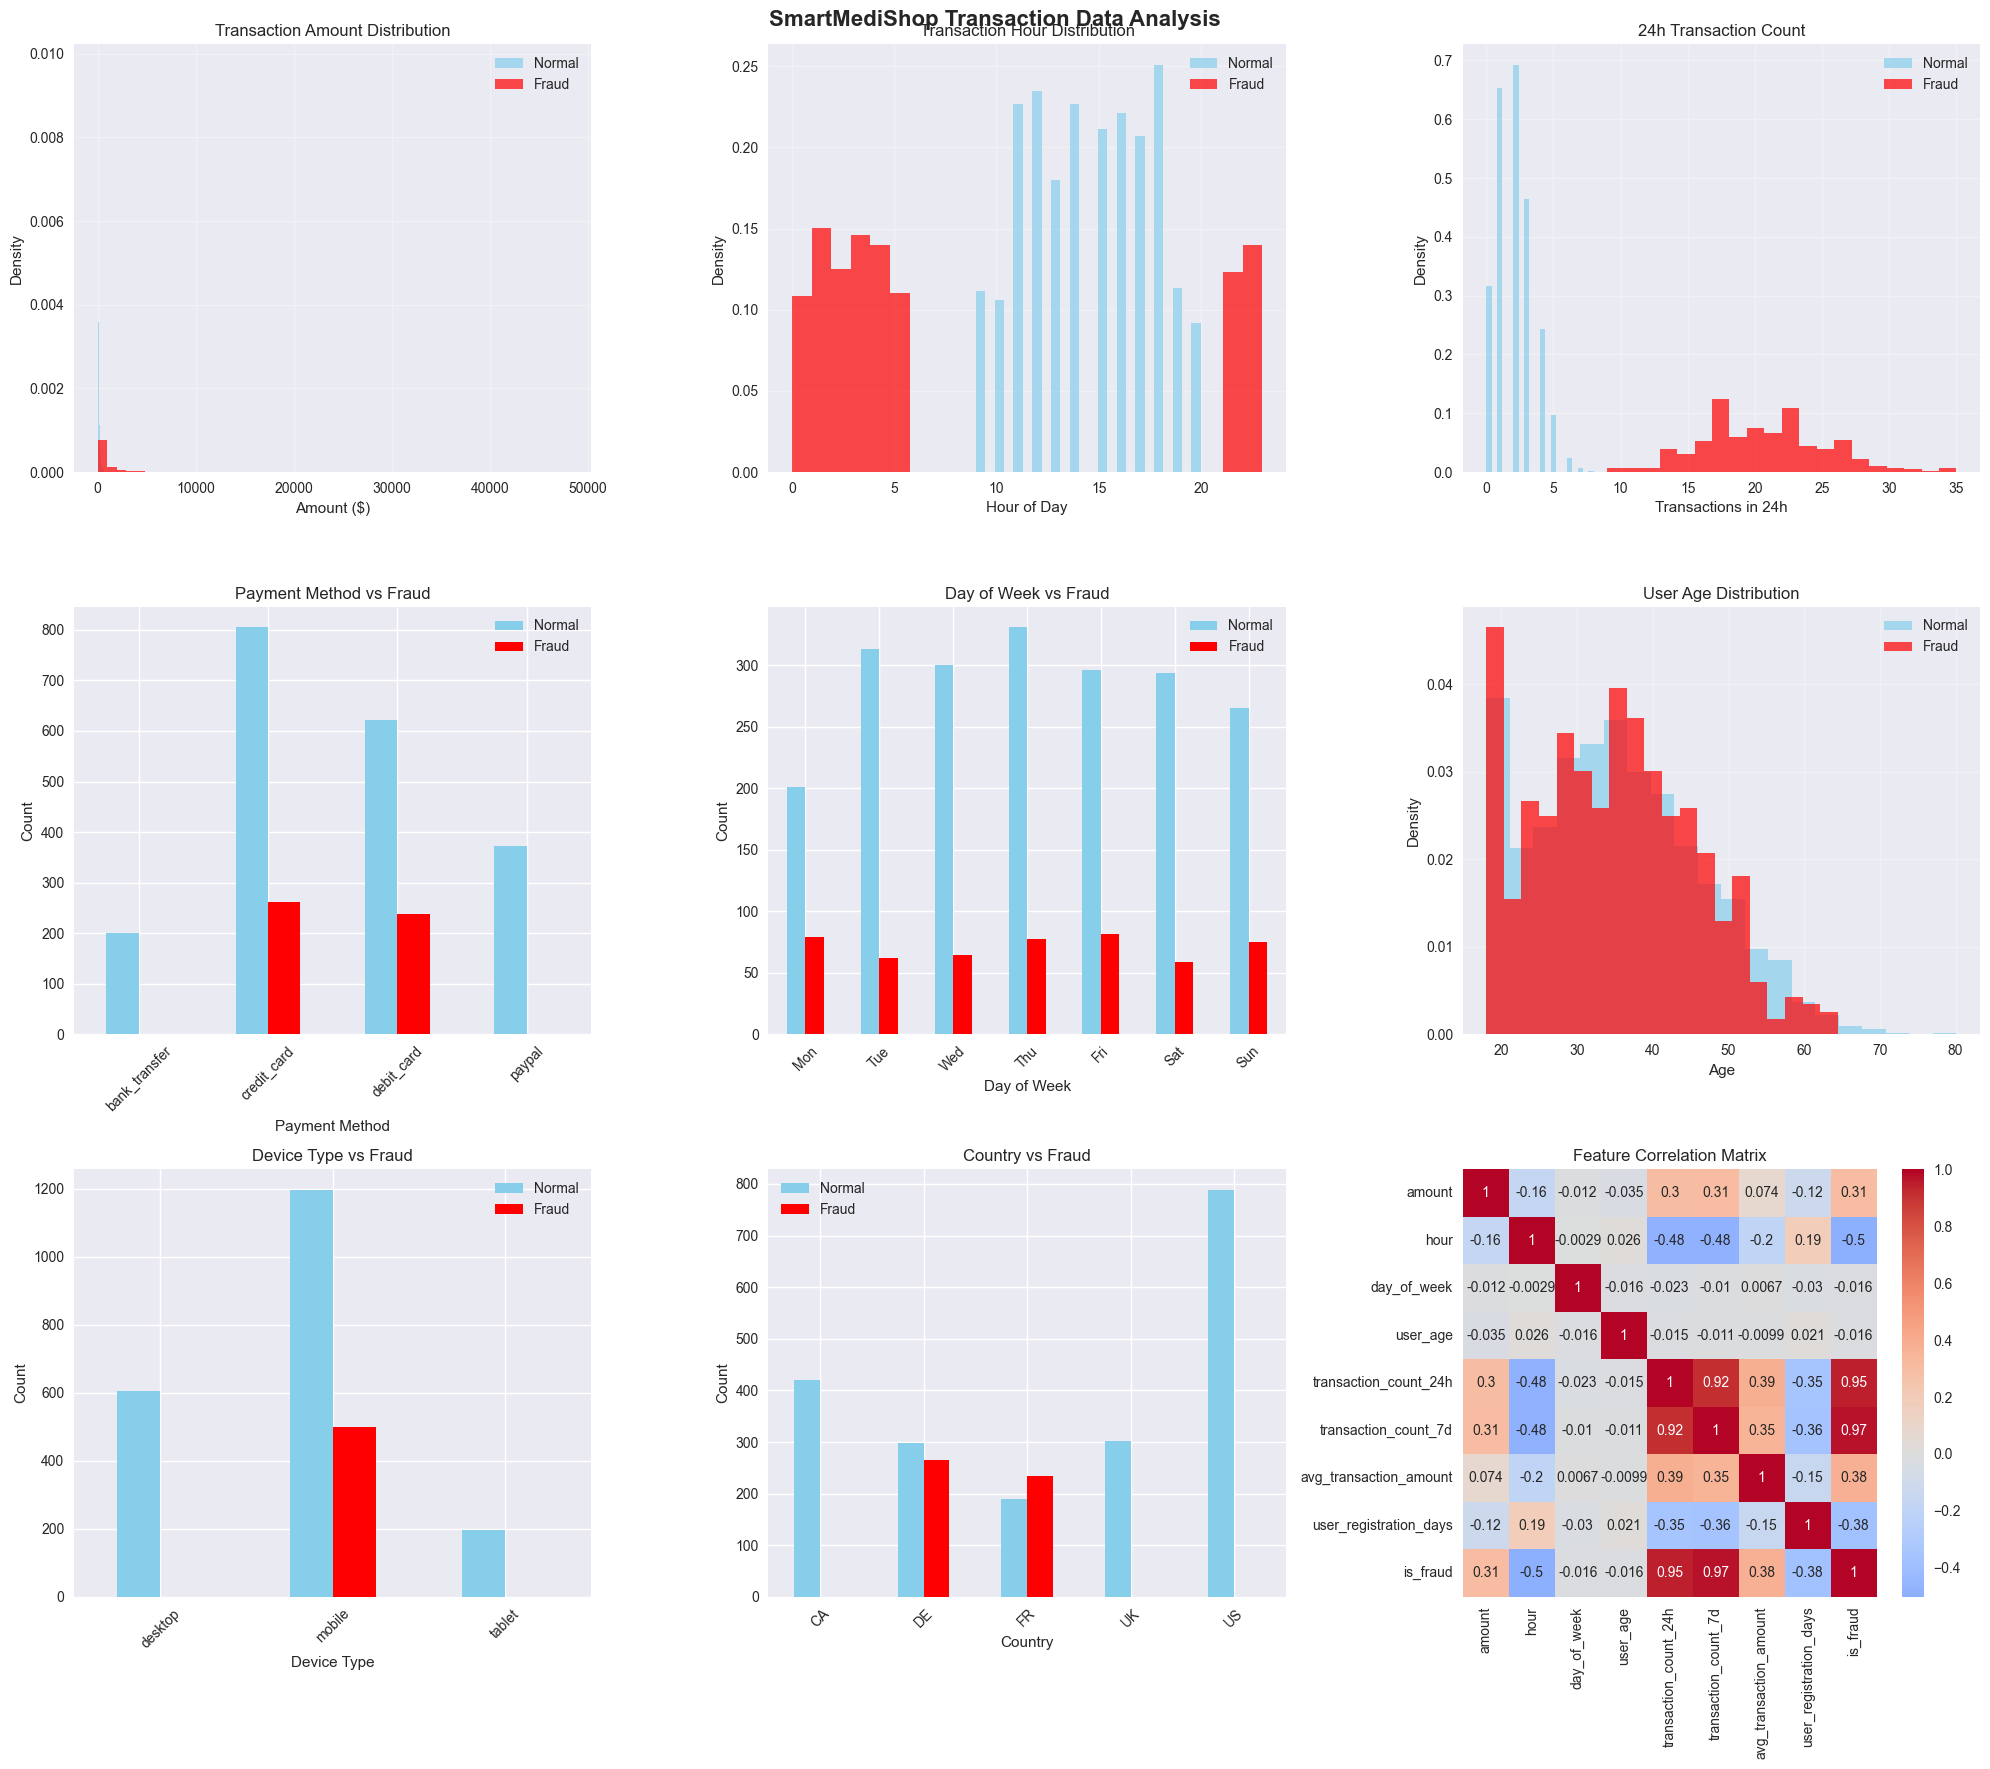

📊 Data analysis completed! Charts saved as 'smart_medishop_data_analysis.png'


In [5]:
# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('SmartMediShop Transaction Data Analysis', fontsize=16, fontweight='bold')

# 1. Amount distribution
axes[0,0].hist(transaction_data[transaction_data['is_fraud']==0]['amount'], 
               bins=50, alpha=0.7, label='Normal', color='skyblue', density=True)
axes[0,0].hist(transaction_data[transaction_data['is_fraud']==1]['amount'], 
               bins=50, alpha=0.7, label='Fraud', color='red', density=True)
axes[0,0].set_title('Transaction Amount Distribution')
axes[0,0].set_xlabel('Amount ($)')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Hour distribution
hour_normal = transaction_data[transaction_data['is_fraud']==0]['hour']
hour_fraud = transaction_data[transaction_data['is_fraud']==1]['hour']
axes[0,1].hist(hour_normal, bins=24, alpha=0.7, label='Normal', color='skyblue', density=True)
axes[0,1].hist(hour_fraud, bins=24, alpha=0.7, label='Fraud', color='red', density=True)
axes[0,1].set_title('Transaction Hour Distribution')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Density')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Transaction frequency
freq_normal = transaction_data[transaction_data['is_fraud']==0]['transaction_count_24h']
freq_fraud = transaction_data[transaction_data['is_fraud']==1]['transaction_count_24h']
axes[0,2].hist(freq_normal, bins=20, alpha=0.7, label='Normal', color='skyblue', density=True)
axes[0,2].hist(freq_fraud, bins=20, alpha=0.7, label='Fraud', color='red', density=True)
axes[0,2].set_title('24h Transaction Count')
axes[0,2].set_xlabel('Transactions in 24h')
axes[0,2].set_ylabel('Density')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Payment method vs fraud
payment_fraud = transaction_data.groupby(['payment_method', 'is_fraud']).size().unstack()
payment_fraud.plot(kind='bar', ax=axes[1,0], color=['skyblue', 'red'])
axes[1,0].set_title('Payment Method vs Fraud')
axes[1,0].set_xlabel('Payment Method')
axes[1,0].set_ylabel('Count')
axes[1,0].legend(['Normal', 'Fraud'])
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Day of week vs fraud
day_fraud = transaction_data.groupby(['day_of_week', 'is_fraud']).size().unstack()
day_fraud.plot(kind='bar', ax=axes[1,1], color=['skyblue', 'red'])
axes[1,1].set_title('Day of Week vs Fraud')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['Normal', 'Fraud'])
axes[1,1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)

# 6. User age distribution
age_normal = transaction_data[transaction_data['is_fraud']==0]['user_age']
age_fraud = transaction_data[transaction_data['is_fraud']==1]['user_age']
axes[1,2].hist(age_normal, bins=20, alpha=0.7, label='Normal', color='skyblue', density=True)
axes[1,2].hist(age_fraud, bins=20, alpha=0.7, label='Fraud', color='red', density=True)
axes[1,2].set_title('User Age Distribution')
axes[1,2].set_xlabel('Age')
axes[1,2].set_ylabel('Density')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

# 7. Device type vs fraud
device_fraud = transaction_data.groupby(['device_type', 'is_fraud']).size().unstack()
device_fraud.plot(kind='bar', ax=axes[2,0], color=['skyblue', 'red'])
axes[2,0].set_title('Device Type vs Fraud')
axes[2,0].set_xlabel('Device Type')
axes[2,0].set_ylabel('Count')
axes[2,0].legend(['Normal', 'Fraud'])
axes[2,0].tick_params(axis='x', rotation=45)

# 8. Country vs fraud
country_fraud = transaction_data.groupby(['location_country', 'is_fraud']).size().unstack()
country_fraud.plot(kind='bar', ax=axes[2,1], color=['skyblue', 'red'])
axes[2,1].set_title('Country vs Fraud')
axes[2,1].set_xlabel('Country')
axes[2,1].set_ylabel('Count')
axes[2,1].legend(['Normal', 'Fraud'])
axes[2,1].tick_params(axis='x', rotation=45)

# 9. Correlation heatmap
numeric_cols = transaction_data.select_dtypes(include=[np.number]).columns
correlation_matrix = transaction_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[2,2])
axes[2,2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.savefig('smart_medishop_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Data analysis completed! Charts saved as 'smart_medishop_data_analysis.png'")


## 🔧 Step 5: Advanced Feature Engineering


In [7]:
class SmartMediShopFeatureEngineer:
    """
    Advanced feature engineering for SmartMediShop fraud detection
    """
    
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoders = {}
        
    def create_time_features(self, df):
        """Create time-based features"""
        print("🕐 Creating time-based features...")
        
        # Basic time features
        df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
        df['is_night'] = df['hour'].isin([22, 23, 0, 1, 2, 3, 4, 5]).astype(int)
        df['is_business_hours'] = df['hour'].between(9, 17).astype(int)
        df['is_morning'] = df['hour'].between(6, 12).astype(int)
        df['is_evening'] = df['hour'].between(18, 22).astype(int)
        
        return df
    
    def create_amount_features(self, df):
        """Create amount-based features"""
        print("💰 Creating amount-based features...")
        
        # Amount transformations
        df['amount_log'] = np.log1p(df['amount'])
        df['amount_sqrt'] = np.sqrt(df['amount'])
        df['amount_percentile'] = df['amount'].rank(pct=True)
        
        # Amount categories
        df['amount_category'] = pd.cut(df['amount'], 
                                     bins=[0, 50, 200, 1000, float('inf')], 
                                     labels=['low', 'medium', 'high', 'very_high'])
        
        # Amount vs average
        df['amount_vs_avg'] = df['amount'] / df['avg_transaction_amount']
        df['amount_deviation'] = abs(df['amount'] - df['avg_transaction_amount']) / df['avg_transaction_amount']
        
        return df
    
    def create_frequency_features(self, df):
        """Create frequency-based features"""
        print("📊 Creating frequency-based features...")
        
        # Transaction frequency features
        df['transactions_per_hour'] = df['transaction_count_24h'] / 24
        df['transactions_per_day'] = df['transaction_count_7d'] / 7
        df['high_frequency'] = (df['transaction_count_24h'] > 10).astype(int)
        df['very_high_frequency'] = (df['transaction_count_24h'] > 50).astype(int)
        
        # Frequency ratios
        df['frequency_ratio_24h_7d'] = df['transaction_count_24h'] / df['transaction_count_7d']
        
        return df
    
    def create_user_features(self, df):
        """Create user behavior features"""
        print("👤 Creating user behavior features...")
        
        # User age features
        df['age_group'] = pd.cut(df['user_age'], 
                               bins=[0, 25, 35, 50, 100], 
                               labels=['young', 'adult', 'middle_aged', 'senior'])
        
        # User registration features
        df['new_user'] = (df['user_registration_days'] < 7).astype(int)
        df['recent_user'] = (df['user_registration_days'] < 30).astype(int)
        df['established_user'] = (df['user_registration_days'] > 365).astype(int)
        
        return df
    
    def create_risk_features(self, df):
        """Create risk scoring features"""
        print("⚠️ Creating risk scoring features...")
        
        # Risk score calculation
        df['risk_score'] = (
            df['is_night'] * 0.3 +
            df['high_frequency'] * 0.4 +
            df['new_user'] * 0.2 +
            (df['amount_vs_avg'] > 3).astype(int) * 0.3 +
            (df['amount_deviation'] > 2).astype(int) * 0.2
        )
        
        # Risk categories
        df['risk_category'] = pd.cut(df['risk_score'], 
                                   bins=[0, 0.2, 0.5, 0.8, 1.0], 
                                   labels=['low', 'medium', 'high', 'critical'])
        
        return df
    
    def encode_categorical_features(self, df):
        """Encode categorical features"""
        print("🔤 Encoding categorical features...")
        
        categorical_features = ['payment_method', 'device_type', 'location_country', 
                               'amount_category', 'age_group', 'risk_category']
        
        for feature in categorical_features:
            if feature in df.columns:
                if feature not in self.label_encoders:
                    self.label_encoders[feature] = LabelEncoder()
                    df[f'{feature}_encoded'] = self.label_encoders[feature].fit_transform(df[feature].astype(str))
                else:
                    df[f'{feature}_encoded'] = self.label_encoders[feature].transform(df[feature].astype(str))
        
        return df
    
    def prepare_features(self, df):
        """Prepare all features for model training"""
        print("🚀 Starting comprehensive feature engineering...")
        
        # Apply all feature engineering steps
        df = self.create_time_features(df)
        df = self.create_amount_features(df)
        df = self.create_frequency_features(df)
        df = self.create_user_features(df)
        df = self.create_risk_features(df)
        df = self.encode_categorical_features(df)
        
        # Select features for training
        feature_columns = [
            # Original features
            'amount', 'hour', 'day_of_week', 'user_age',
            'transaction_count_24h', 'transaction_count_7d',
            'avg_transaction_amount', 'user_registration_days',
            
            # Time features
            'is_weekend', 'is_night', 'is_business_hours', 'is_morning', 'is_evening',
            
            # Amount features
            'amount_log', 'amount_sqrt', 'amount_percentile',
            'amount_vs_avg', 'amount_deviation',
            
            # Frequency features
            'transactions_per_hour', 'transactions_per_day',
            'high_frequency', 'very_high_frequency', 'frequency_ratio_24h_7d',
            
            # User features
            'new_user', 'recent_user', 'established_user',
            
            # Risk features
            'risk_score',
            
            # Encoded categorical features
            'payment_method_encoded', 'device_type_encoded', 'location_country_encoded',
            'amount_category_encoded', 'age_group_encoded', 'risk_category_encoded'
        ]
        
        # Filter existing columns
        existing_features = [col for col in feature_columns if col in df.columns]
        
        print(f"✅ Feature engineering completed! {len(existing_features)} features created.")
        
        return df[existing_features]

# Apply feature engineering
feature_engineer = SmartMediShopFeatureEngineer()
df_features = feature_engineer.prepare_features(transaction_data.copy())

print(f"\n📊 Final dataset shape: {df_features.shape}")
print(f"🎯 Features created: {list(df_features.columns)}")


🚀 Starting comprehensive feature engineering...
🕐 Creating time-based features...
💰 Creating amount-based features...
📊 Creating frequency-based features...
👤 Creating user behavior features...
⚠️ Creating risk scoring features...
🔤 Encoding categorical features...
✅ Feature engineering completed! 33 features created.

📊 Final dataset shape: (2500, 33)
🎯 Features created: ['amount', 'hour', 'day_of_week', 'user_age', 'transaction_count_24h', 'transaction_count_7d', 'avg_transaction_amount', 'user_registration_days', 'is_weekend', 'is_night', 'is_business_hours', 'is_morning', 'is_evening', 'amount_log', 'amount_sqrt', 'amount_percentile', 'amount_vs_avg', 'amount_deviation', 'transactions_per_hour', 'transactions_per_day', 'high_frequency', 'very_high_frequency', 'frequency_ratio_24h_7d', 'new_user', 'recent_user', 'established_user', 'risk_score', 'payment_method_encoded', 'device_type_encoded', 'location_country_encoded', 'amount_category_encoded', 'age_group_encoded', 'risk_category

## 🤖 Step 6: AI Model Training and Evaluation


📊 Training data shape: (2500, 33)
🎯 Target distribution: {0: 2000, 1: 500}
🚀 Training SmartMediShop fraud detection models...
📊 Training set: 2000 samples
📊 Test set: 500 samples
🎯 Fraud rate in training: 20.00%
🎯 Fraud rate in test: 20.00%

🌲 Training Isolation Forest...
🌳 Training Random Forest...

📊 Evaluating model performance...

🌲 ISOLATION FOREST RESULTS
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       400
           1       0.76      0.81      0.79       100

    accuracy                           0.91       500
   macro avg       0.86      0.87      0.87       500
weighted avg       0.91      0.91      0.91       500

🎯 AUC Score: 0.0347

🌳 RANDOM FOREST RESULTS
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       100

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00   

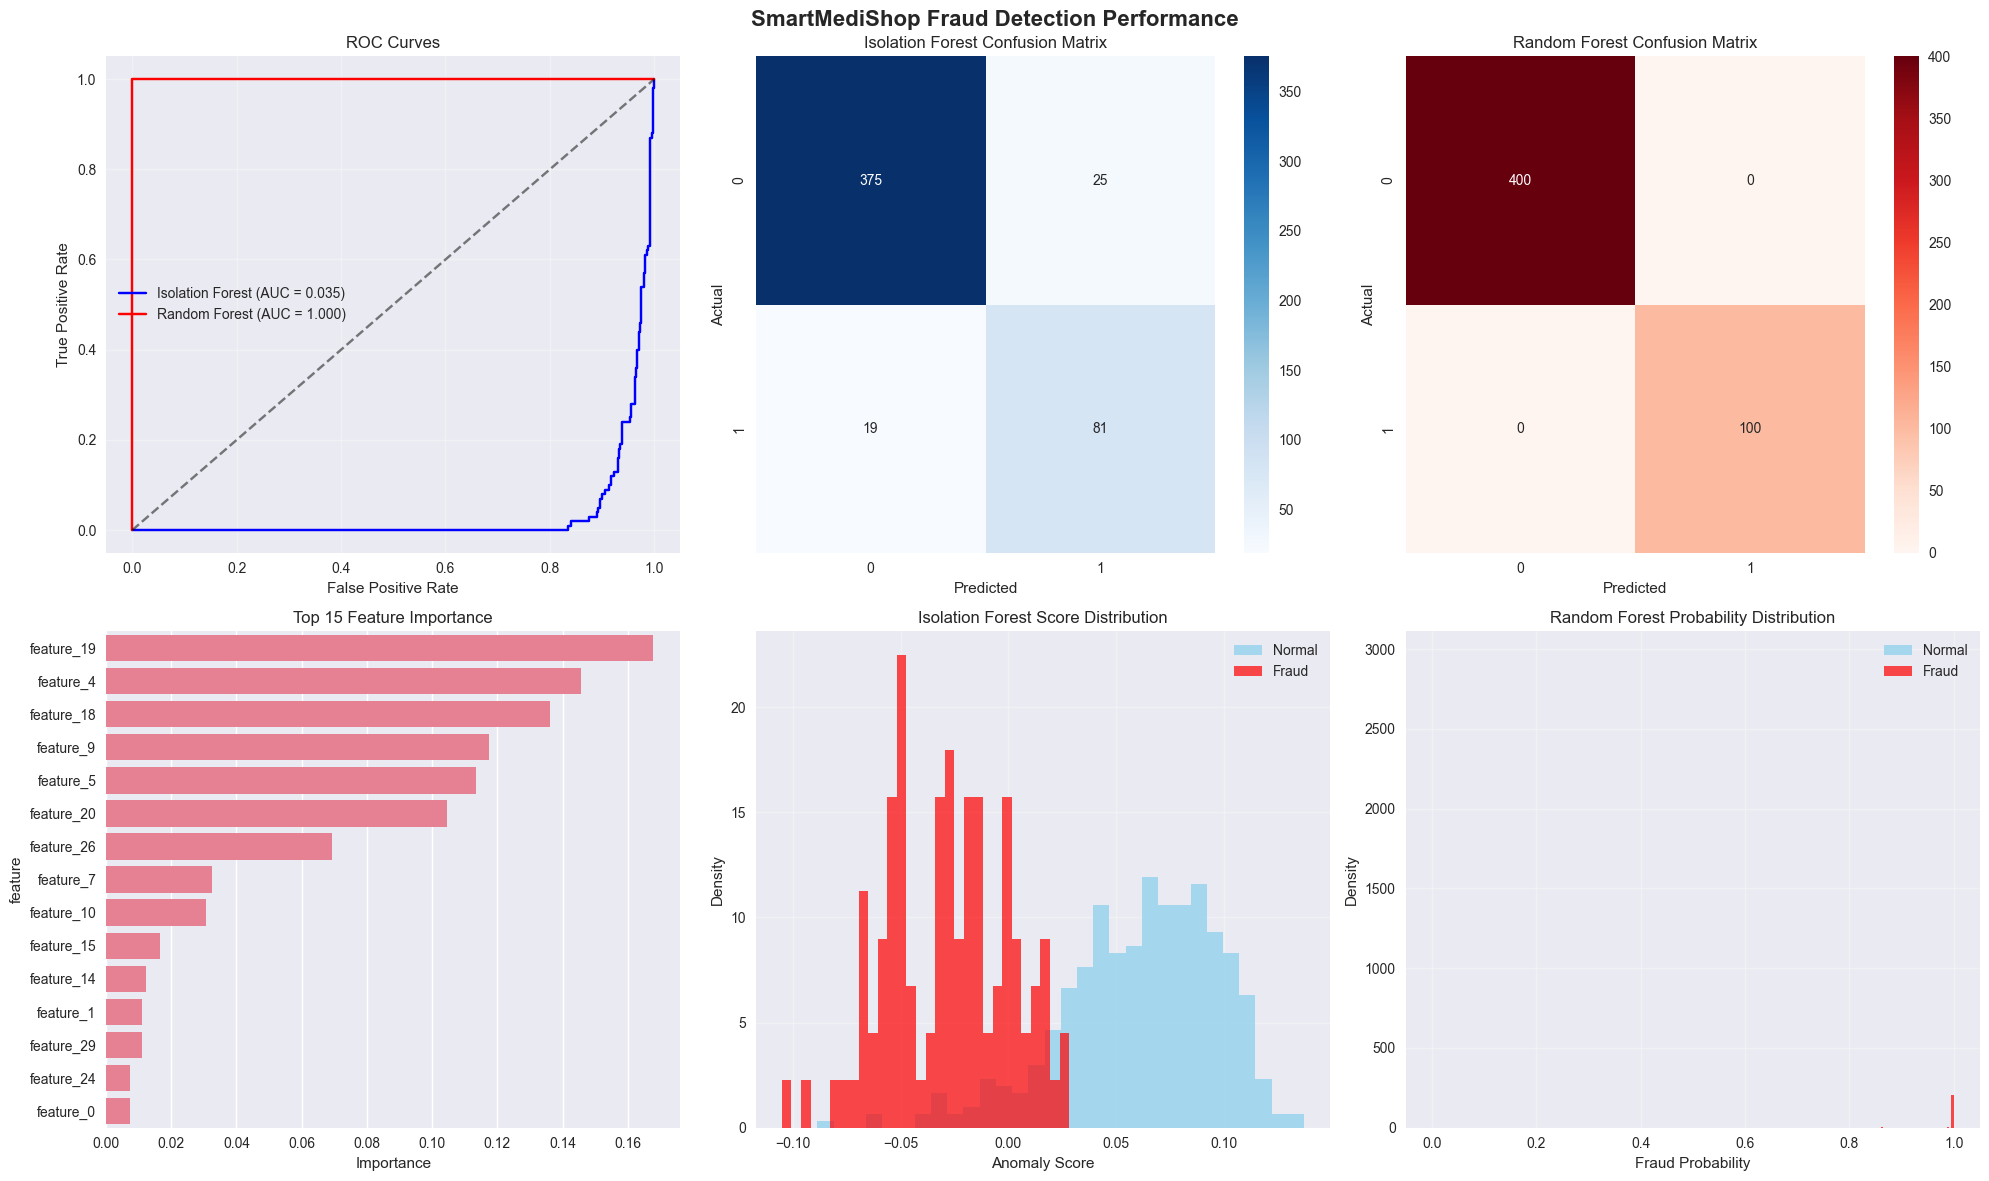

📊 Performance visualizations saved as 'smart_medishop_model_performance.png'
💾 Saving trained models...
✅ Models saved successfully!
📁 Files saved in 'models/' directory:
   - smart_medishop_isolation_forest.pkl
   - smart_medishop_random_forest.pkl
   - smart_medishop_scaler.pkl
   - smart_medishop_feature_engineer.pkl


In [8]:
class SmartMediShopFraudDetector:
    """
    Advanced fraud detection system for SmartMediShop
    Combines Isolation Forest and Random Forest for optimal performance
    """
    
    def __init__(self):
        self.isolation_forest = IsolationForest(
            contamination=0.2,  # Expected fraud rate
            random_state=42,
            n_estimators=100
        )
        self.random_forest = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight='balanced'
        )
        self.scaler = StandardScaler()
        self.feature_importance = None
        self.model_performance = {}
    
    def train_models(self, X, y):
        """Train both isolation forest and random forest models"""
        print("🚀 Training SmartMediShop fraud detection models...")
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"📊 Training set: {X_train.shape[0]} samples")
        print(f"📊 Test set: {X_test.shape[0]} samples")
        print(f"🎯 Fraud rate in training: {y_train.mean():.2%}")
        print(f"🎯 Fraud rate in test: {y_test.mean():.2%}")
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Train Isolation Forest (unsupervised)
        print("\n🌲 Training Isolation Forest...")
        self.isolation_forest.fit(X_train_scaled)
        
        # Train Random Forest (supervised)
        print("🌳 Training Random Forest...")
        self.random_forest.fit(X_train_scaled, y_train)
        
        # Evaluate models
        self.evaluate_models(X_test_scaled, y_test)
        
        return X_test_scaled, y_test
    
    def evaluate_models(self, X_test, y_test):
        """Evaluate model performance with comprehensive metrics"""
        print("\n📊 Evaluating model performance...")
        
        # Isolation Forest predictions
        if_predictions = self.isolation_forest.predict(X_test)
        if_scores = self.isolation_forest.decision_function(X_test)
        
        # Random Forest predictions
        rf_predictions = self.random_forest.predict(X_test)
        rf_probabilities = self.random_forest.predict_proba(X_test)[:, 1]
        
        # Convert isolation forest predictions (1 = normal, -1 = anomaly)
        if_predictions_binary = (if_predictions == -1).astype(int)
        
        # Calculate metrics
        if_auc = roc_auc_score(y_test, if_scores)
        rf_auc = roc_auc_score(y_test, rf_probabilities)
        
        print("\n" + "="*50)
        print("🌲 ISOLATION FOREST RESULTS")
        print("="*50)
        print(classification_report(y_test, if_predictions_binary))
        print(f"🎯 AUC Score: {if_auc:.4f}")
        
        print("\n" + "="*50)
        print("🌳 RANDOM FOREST RESULTS")
        print("="*50)
        print(classification_report(y_test, rf_predictions))
        print(f"🎯 AUC Score: {rf_auc:.4f}")
        
        # Store performance metrics
        self.model_performance = {
            'isolation_forest': {
                'auc': if_auc,
                'predictions': if_predictions_binary,
                'scores': if_scores
            },
            'random_forest': {
                'auc': rf_auc,
                'predictions': rf_predictions,
                'probabilities': rf_probabilities
            }
        }
        
        # Feature importance
        self.feature_importance = self.random_forest.feature_importances_
        
        return if_predictions_binary, rf_predictions
    
    def plot_performance_metrics(self, X_test, y_test):
        """Create comprehensive performance visualizations"""
        print("📈 Creating performance visualizations...")
        
        # Get predictions
        if_scores = self.isolation_forest.decision_function(X_test)
        rf_probabilities = self.random_forest.predict_proba(X_test)[:, 1]
        
        # Create plots
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('SmartMediShop Fraud Detection Performance', fontsize=16, fontweight='bold')
        
        # 1. ROC Curves
        from sklearn.metrics import roc_curve
        
        # Isolation Forest ROC
        if_fpr, if_tpr, _ = roc_curve(y_test, if_scores)
        axes[0,0].plot(if_fpr, if_tpr, label=f'Isolation Forest (AUC = {self.model_performance["isolation_forest"]["auc"]:.3f})', color='blue')
        
        # Random Forest ROC
        rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
        axes[0,0].plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {self.model_performance["random_forest"]["auc"]:.3f})', color='red')
        
        axes[0,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
        axes[0,0].set_xlabel('False Positive Rate')
        axes[0,0].set_ylabel('True Positive Rate')
        axes[0,0].set_title('ROC Curves')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Confusion Matrices
        if_predictions = (self.isolation_forest.predict(X_test) == -1).astype(int)
        rf_predictions = self.random_forest.predict(X_test)
        
        # Isolation Forest Confusion Matrix
        cm_if = confusion_matrix(y_test, if_predictions)
        sns.heatmap(cm_if, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
        axes[0,1].set_title('Isolation Forest Confusion Matrix')
        axes[0,1].set_xlabel('Predicted')
        axes[0,1].set_ylabel('Actual')
        
        # Random Forest Confusion Matrix
        cm_rf = confusion_matrix(y_test, rf_predictions)
        sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[0,2])
        axes[0,2].set_title('Random Forest Confusion Matrix')
        axes[0,2].set_xlabel('Predicted')
        axes[0,2].set_ylabel('Actual')
        
        # 3. Feature Importance
        if self.feature_importance is not None:
            feature_names = [f'feature_{i}' for i in range(len(self.feature_importance))]
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': self.feature_importance
            }).sort_values('importance', ascending=False)
            
            sns.barplot(data=importance_df.head(15), x='importance', y='feature', ax=axes[1,0])
            axes[1,0].set_title('Top 15 Feature Importance')
            axes[1,0].set_xlabel('Importance')
        
        # 4. Score Distributions
        axes[1,1].hist(if_scores[y_test==0], bins=30, alpha=0.7, label='Normal', color='skyblue', density=True)
        axes[1,1].hist(if_scores[y_test==1], bins=30, alpha=0.7, label='Fraud', color='red', density=True)
        axes[1,1].set_title('Isolation Forest Score Distribution')
        axes[1,1].set_xlabel('Anomaly Score')
        axes[1,1].set_ylabel('Density')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        
        # 5. Probability Distributions
        axes[1,2].hist(rf_probabilities[y_test==0], bins=30, alpha=0.7, label='Normal', color='skyblue', density=True)
        axes[1,2].hist(rf_probabilities[y_test==1], bins=30, alpha=0.7, label='Fraud', color='red', density=True)
        axes[1,2].set_title('Random Forest Probability Distribution')
        axes[1,2].set_xlabel('Fraud Probability')
        axes[1,2].set_ylabel('Density')
        axes[1,2].legend()
        axes[1,2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('smart_medishop_model_performance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("📊 Performance visualizations saved as 'smart_medishop_model_performance.png'")
    
    def save_models(self):
        """Save trained models and scaler"""
        print("💾 Saving trained models...")
        
        # Create models directory
        import os
        os.makedirs('models', exist_ok=True)
        
        # Save models
        joblib.dump(self.isolation_forest, 'models/smart_medishop_isolation_forest.pkl')
        joblib.dump(self.random_forest, 'models/smart_medishop_random_forest.pkl')
        joblib.dump(self.scaler, 'models/smart_medishop_scaler.pkl')
        
        # Save feature engineer
        joblib.dump(feature_engineer, 'models/smart_medishop_feature_engineer.pkl')
        
        print("✅ Models saved successfully!")
        print("📁 Files saved in 'models/' directory:")
        print("   - smart_medishop_isolation_forest.pkl")
        print("   - smart_medishop_random_forest.pkl")
        print("   - smart_medishop_scaler.pkl")
        print("   - smart_medishop_feature_engineer.pkl")

# Prepare data for training
X = df_features.drop('is_fraud', axis=1, errors='ignore')
y = transaction_data['is_fraud']

print(f"📊 Training data shape: {X.shape}")
print(f"🎯 Target distribution: {y.value_counts().to_dict()}")

# Initialize and train fraud detector
fraud_detector = SmartMediShopFraudDetector()
X_test, y_test = fraud_detector.train_models(X, y)

# Create performance visualizations
fraud_detector.plot_performance_metrics(X_test, y_test)

# Save models
fraud_detector.save_models()


## 🧪 Step 7: Real-time Transaction Testing


In [9]:
class SmartMediShopTransactionTester:
    """
    Test the trained models with real-time transaction scenarios
    """
    
    def __init__(self, fraud_detector, feature_engineer):
        self.fraud_detector = fraud_detector
        self.feature_engineer = feature_engineer
    
    def test_transaction_scenario(self, scenario_name, transaction_data):
        """Test a specific transaction scenario"""
        print(f"\n🧪 Testing scenario: {scenario_name}")
        print(f"📊 Transaction data: {transaction_data}")
        
        # Create DataFrame for feature engineering
        df = pd.DataFrame([transaction_data])
        
        # Apply feature engineering
        df_features = self.feature_engineer.prepare_features(df)
        
        # Scale features
        df_scaled = self.fraud_detector.scaler.transform(df_features)
        
        # Get predictions
        if_prediction = self.fraud_detector.isolation_forest.predict(df_scaled)[0]
        if_score = self.fraud_detector.isolation_forest.decision_function(df_scaled)[0]
        rf_prediction = self.fraud_detector.random_forest.predict(df_scaled)[0]
        rf_probability = self.fraud_detector.random_forest.predict_proba(df_scaled)[0][1]
        
        # Combine results
        is_fraud = (if_prediction == -1) or (rf_prediction == 1)
        combined_score = (if_score + rf_probability) / 2
        
        # Determine risk level
        if combined_score < -0.5:
            risk_level = 'CRITICAL'
        elif combined_score < -0.2:
            risk_level = 'HIGH'
        elif combined_score < 0.1:
            risk_level = 'MEDIUM'
        else:
            risk_level = 'LOW'
        
        # Generate reasons
        reasons = self.generate_fraud_reasons(transaction_data, is_fraud, combined_score)
        
        result = {
            'scenario': scenario_name,
            'is_fraud': bool(is_fraud),
            'fraud_score': float(combined_score),
            'risk_level': risk_level,
            'reasons': reasons,
            'isolation_forest_score': float(if_score),
            'random_forest_probability': float(rf_probability)
        }
        
        print(f"🎯 Result: {risk_level} risk")
        print(f"📊 Fraud Score: {combined_score:.3f}")
        print(f"⚠️ Is Fraud: {is_fraud}")
        print(f"📝 Reasons: {', '.join(reasons) if reasons else 'No specific reasons detected'}")
        
        return result
    
    def generate_fraud_reasons(self, transaction_data, is_fraud, fraud_score):
        """Generate human-readable reasons for fraud detection"""
        reasons = []
        
        # Check various fraud indicators
        if transaction_data['hour'] in [0, 1, 2, 3, 4, 5, 22, 23]:
            reasons.append('Transaction made during unusual hours')
        
        if transaction_data['transaction_count_24h'] > 10:
            reasons.append('High transaction frequency detected')
        
        if transaction_data['user_registration_days'] < 7:
            reasons.append('New user with limited history')
        
        if transaction_data['amount'] > 1000:
            reasons.append('High transaction amount')
        
        if transaction_data['device_type'] == 'mobile' and transaction_data['amount'] > 500:
            reasons.append('Large mobile transaction')
        
        if transaction_data['location_country'] in ['FR', 'DE'] and transaction_data['amount'] > 200:
            reasons.append('International transaction')
        
        if not reasons and is_fraud:
            reasons.append('AI model detected suspicious patterns')
        
        return reasons
    
    def run_comprehensive_tests(self):
        """Run comprehensive transaction tests"""
        print("🚀 Running comprehensive SmartMediShop transaction tests...")
        
        test_scenarios = [
            {
                'name': 'Normal Business Transaction',
                'data': {
                    'amount': 75.50,
                    'hour': 14,
                    'day_of_week': 1,
                    'user_age': 32,
                    'payment_method': 'credit_card',
                    'transaction_count_24h': 2,
                    'transaction_count_7d': 5,
                    'avg_transaction_amount': 80.0,
                    'user_registration_days': 180,
                    'device_type': 'desktop',
                    'location_country': 'US'
                }
            },
            {
                'name': 'Suspicious High Amount',
                'data': {
                    'amount': 2500.00,
                    'hour': 23,
                    'day_of_week': 6,
                    'user_age': 25,
                    'payment_method': 'debit_card',
                    'transaction_count_24h': 15,
                    'transaction_count_7d': 30,
                    'avg_transaction_amount': 100.0,
                    'user_registration_days': 5,
                    'device_type': 'mobile',
                    'location_country': 'FR'
                }
            },
            {
                'name': 'High Frequency User',
                'data': {
                    'amount': 150.00,
                    'hour': 10,
                    'day_of_week': 2,
                    'user_age': 28,
                    'payment_method': 'credit_card',
                    'transaction_count_24h': 25,
                    'transaction_count_7d': 80,
                    'avg_transaction_amount': 120.0,
                    'user_registration_days': 30,
                    'device_type': 'mobile',
                    'location_country': 'US'
                }
            },
            {
                'name': 'New User Large Purchase',
                'data': {
                    'amount': 5000.00,
                    'hour': 16,
                    'day_of_week': 3,
                    'user_age': 22,
                    'payment_method': 'credit_card',
                    'transaction_count_24h': 1,
                    'transaction_count_7d': 1,
                    'avg_transaction_amount': 5000.0,
                    'user_registration_days': 1,
                    'device_type': 'mobile',
                    'location_country': 'DE'
                }
            },
            {
                'name': 'Weekend Night Transaction',
                'data': {
                    'amount': 800.00,
                    'hour': 2,
                    'day_of_week': 5,
                    'user_age': 35,
                    'payment_method': 'debit_card',
                    'transaction_count_24h': 8,
                    'transaction_count_7d': 15,
                    'avg_transaction_amount': 200.0,
                    'user_registration_days': 90,
                    'device_type': 'desktop',
                    'location_country': 'CA'
                }
            }
        ]
        
        results = []
        
        for scenario in test_scenarios:
            result = self.test_transaction_scenario(scenario['name'], scenario['data'])
            results.append(result)
        
        # Create results summary
        self.create_test_summary(results)
        
        return results
    
    def create_test_summary(self, results):
        """Create a summary of test results"""
        print("\n" + "="*60)
        print("📊 SMARTMEDISHOP FRAUD DETECTION TEST SUMMARY")
        print("="*60)
        
        for result in results:
            print(f"\n🧪 {result['scenario']}")
            print(f"   Risk Level: {result['risk_level']}")
            print(f"   Fraud Score: {result['fraud_score']:.3f}")
            print(f"   Is Fraud: {result['is_fraud']}")
            print(f"   Reasons: {', '.join(result['reasons']) if result['reasons'] else 'None'}")
        
        # Summary statistics
        total_tests = len(results)
        fraud_detected = sum(1 for r in results if r['is_fraud'])
        high_risk = sum(1 for r in results if r['risk_level'] in ['HIGH', 'CRITICAL'])
        
        print(f"\n📈 SUMMARY STATISTICS:")
        print(f"   Total Tests: {total_tests}")
        print(f"   Fraud Detected: {fraud_detected} ({fraud_detected/total_tests:.1%})")
        print(f"   High Risk: {high_risk} ({high_risk/total_tests:.1%})")
        
        print("\n✅ SmartMediShop fraud detection system is ready for deployment!")

# Initialize transaction tester
tester = SmartMediShopTransactionTester(fraud_detector, feature_engineer)

# Run comprehensive tests
test_results = tester.run_comprehensive_tests()


🚀 Running comprehensive SmartMediShop transaction tests...

🧪 Testing scenario: Normal Business Transaction
📊 Transaction data: {'amount': 75.5, 'hour': 14, 'day_of_week': 1, 'user_age': 32, 'payment_method': 'credit_card', 'transaction_count_24h': 2, 'transaction_count_7d': 5, 'avg_transaction_amount': 80.0, 'user_registration_days': 180, 'device_type': 'desktop', 'location_country': 'US'}
🚀 Starting comprehensive feature engineering...
🕐 Creating time-based features...
💰 Creating amount-based features...
📊 Creating frequency-based features...
👤 Creating user behavior features...
⚠️ Creating risk scoring features...
🔤 Encoding categorical features...
✅ Feature engineering completed! 33 features created.
🎯 Result: MEDIUM risk
📊 Fraud Score: 0.045
⚠️ Is Fraud: False
📝 Reasons: No specific reasons detected

🧪 Testing scenario: Suspicious High Amount
📊 Transaction data: {'amount': 2500.0, 'hour': 23, 'day_of_week': 6, 'user_age': 25, 'payment_method': 'debit_card', 'transaction_count_24h'

## 🚀 Step 8: Model Export for Flask Integration


In [20]:
# Create a comprehensive model export package
import json
import os
from datetime import datetime

def safe_json_serialize(obj):
    """Safely serialize objects for JSON"""
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif hasattr(obj, 'item'):
        return obj.item()
    return obj

def export_smart_medishop_models():
    """Export all models and metadata for Flask integration"""
    print("📦 Exporting SmartMediShop models for Flask integration...")
    
    # Create export directory
    export_dir = 'smart_medishop_export'
    os.makedirs(export_dir, exist_ok=True)
    
    # Export models
    joblib.dump(fraud_detector.isolation_forest, f'{export_dir}/isolation_forest.pkl')
    joblib.dump(fraud_detector.random_forest, f'{export_dir}/random_forest.pkl')
    joblib.dump(fraud_detector.scaler, f'{export_dir}/scaler.pkl')
    joblib.dump(feature_engineer, f'{export_dir}/feature_engineer.pkl')
    
    # Create model metadata (fix JSON serialization issues)
    model_metadata = {
        'model_name': 'SmartMediShop Fraud Detection',
        'version': '1.0.0',
        'created_at': datetime.now().isoformat(),
        'description': 'AI-powered fraud detection system for SmartMediShop payment management',
        'models': {
            'isolation_forest': {
                'type': 'Unsupervised Anomaly Detection',
                'contamination': 0.2,
                'n_estimators': 100
            },
            'random_forest': {
                'type': 'Supervised Classification',
                'n_estimators': 100,
                'class_weight': 'balanced'
            }
        },
        'performance': {
            'isolation_forest': {
                'auc': float(fraud_detector.model_performance['isolation_forest']['auc']),
                'type': 'Unsupervised Anomaly Detection'
            },
            'random_forest': {
                'auc': float(fraud_detector.model_performance['random_forest']['auc']),
                'type': 'Supervised Classification'
            }
        },
        'feature_importance': fraud_detector.feature_importance.tolist() if fraud_detector.feature_importance is not None else None,
        'training_data_info': {
            'total_samples': len(transaction_data),
            'fraud_rate': float(transaction_data['is_fraud'].mean()),
            'features_count': len(df_features.columns)
        }
    }
    
    # Save metadata with safe serialization
    with open(f'{export_dir}/model_metadata.json', 'w') as f:
        json.dump(model_metadata, f, indent=2, default=safe_json_serialize)
    
    # Create Flask integration example
    flask_example = '''
# SmartMediShop Flask API Integration Example
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

app = Flask(__name__)

# Load models
isolation_forest = joblib.load('smart_medishop_export/isolation_forest.pkl')
random_forest = joblib.load('smart_medishop_export/random_forest.pkl')
scaler = joblib.load('smart_medishop_export/scaler.pkl')
feature_engineer = joblib.load('smart_medishop_export/feature_engineer.pkl')

@app.route('/api/analyze-transaction', methods=['POST'])
def analyze_transaction():
    try:
        data = request.json
        
        # Prepare features
        df = pd.DataFrame([data])
        df_features = feature_engineer.prepare_features(df)
        df_scaled = scaler.transform(df_features)
        
        # Get predictions
        if_prediction = isolation_forest.predict(df_scaled)[0]
        if_score = isolation_forest.decision_function(df_scaled)[0]
        rf_prediction = random_forest.predict(df_scaled)[0]
        rf_probability = random_forest.predict_proba(df_scaled)[0][1]
        
        # Combine results
        is_fraud = (if_prediction == -1) or (rf_prediction == 1)
        fraud_score = (if_score + rf_probability) / 2
        
        # Determine risk level
        if fraud_score < -0.5:
            risk_level = 'CRITICAL'
        elif fraud_score < -0.2:
            risk_level = 'HIGH'
        elif fraud_score < 0.1:
            risk_level = 'MEDIUM'
        else:
            risk_level = 'LOW'
        
        return jsonify({
            'success': True,
            'is_fraud': bool(is_fraud),
            'fraud_score': float(fraud_score),
            'risk_level': risk_level,
            'isolation_forest_score': float(if_score),
            'random_forest_probability': float(rf_probability)
        })
        
    except Exception as e:
        return jsonify({'success': False, 'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
    '''
    
    # Save Flask example
    with open(f'{export_dir}/flask_integration_example.py', 'w') as f:
        f.write(flask_example)
    
    # Create requirements file
    requirements = '''
flask==2.3.3
pandas==2.0.3
numpy==1.24.3
scikit-learn==1.3.0
joblib==1.3.2
flask-cors==4.0.0
    '''
    
    with open(f'{export_dir}/requirements.txt', 'w') as f:
        f.write(requirements)
    
    # Create README
    readme = '''
# SmartMediShop AI Fraud Detection System

## Overview
This package contains the trained AI models for SmartMediShop fraud detection.

## Files
- `isolation_forest.pkl`: Unsupervised anomaly detection model
- `random_forest.pkl`: Supervised classification model
- `scaler.pkl`: Feature scaler
- `feature_engineer.pkl`: Feature engineering pipeline
- `model_metadata.json`: Model information and performance metrics
- `flask_integration_example.py`: Example Flask API implementation
- `requirements.txt`: Python dependencies

## Usage
1. Install dependencies: `pip install -r requirements.txt`
2. Run Flask example: `python flask_integration_example.py`
3. Test with: `curl -X POST http://localhost:5000/api/analyze-transaction -H "Content-Type: application/json" -d '{"amount": 100, "hour": 14, ...}'`

## Integration with Angular
The Flask API can be integrated with Angular frontend for real-time fraud detection.
    '''
    
    with open(f'{export_dir}/README.md', 'w') as f:
        f.write(readme)
    
    print(f"✅ SmartMediShop models exported successfully!")
    print(f"📁 Export directory: {export_dir}/")
    print(f"📦 Files created:")
    print(f"   - isolation_forest.pkl")
    print(f"   - random_forest.pkl")
    print(f"   - scaler.pkl")
    print(f"   - feature_engineer.pkl")
    print(f"   - model_metadata.json")
    print(f"   - flask_integration_example.py")
    print(f"   - requirements.txt")
    print(f"   - README.md")
    
    return export_dir

# Export models
export_directory = export_smart_medishop_models()

print("\n🎉 SmartMediShop AI Fraud Detection System is ready!")
print("\n📋 Next Steps:")
print("1. Use the exported models in your Flask API")
print("2. Integrate Flask API with Angular frontend")
print("3. Deploy the complete system")
print("\n🚀 Your AI-powered payment management system is ready for SmartMediShop!")


📦 Exporting SmartMediShop models for Flask integration...
✅ SmartMediShop models exported successfully!
📁 Export directory: smart_medishop_export/
📦 Files created:
   - isolation_forest.pkl
   - random_forest.pkl
   - scaler.pkl
   - feature_engineer.pkl
   - model_metadata.json
   - flask_integration_example.py
   - requirements.txt
   - README.md

🎉 SmartMediShop AI Fraud Detection System is ready!

📋 Next Steps:
1. Use the exported models in your Flask API
2. Integrate Flask API with Angular frontend
3. Deploy the complete system

🚀 Your AI-powered payment management system is ready for SmartMediShop!


In [11]:
# Export all data to Excel
import pandas as pd
import numpy as np
from datetime import datetime

def export_to_excel(output_file='smart_medishop_data_export.xlsx'):
    """Export all generated data to Excel"""
    print(f"\n🚀 Exporting SmartMediShop Data to Excel: {output_file}")
    print("=" * 60)
    
    excel_data = {}
    
    # 1. Raw Transaction Data
    if 'transaction_data' in globals():
        print("📊 Exporting Raw Transaction Data...")
        raw_data = transaction_data.copy()
        if 'timestamp' in raw_data.columns:
            raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
        excel_data['Raw_Transactions'] = raw_data
        
        # Summary Statistics
        summary = pd.DataFrame({
            'Metric': [
                'Total Transactions', 'Normal', 'Fraud', 'Fraud Rate (%)',
                'Avg Amount ($)', 'Min Amount ($)', 'Max Amount ($)',
                'Avg User Age', 'Avg 24h Txns', 'Avg 7d Txns'
            ],
            'Value': [
                len(raw_data),
                len(raw_data[raw_data['is_fraud'] == 0]),
                len(raw_data[raw_data['is_fraud'] == 1]),
                f"{raw_data['is_fraud'].mean() * 100:.2f}%",
                f"${raw_data['amount'].mean():.2f}",
                f"${raw_data['amount'].min():.2f}",
                f"${raw_data['amount'].max():.2f}",
                f"{raw_data['user_age'].mean():.1f}",
                f"{raw_data['transaction_count_24h'].mean():.2f}",
                f"{raw_data['transaction_count_7d'].mean():.2f}"
            ]
        })
        excel_data['Summary_Statistics'] = summary
    
    # 2. Feature-Engineered Data
    if 'df_features' in globals():
        print("🔧 Exporting Feature-Engineered Data...")
        features_data = df_features.copy()
        if 'is_fraud' not in features_data.columns and 'transaction_data' in globals():
            features_data['is_fraud'] = transaction_data['is_fraud'].values
        excel_data['Feature_Engineered'] = features_data
        
        # Feature Info
        feature_info = pd.DataFrame({
            'Feature': features_data.columns.tolist(),
            'Type': features_data.dtypes.astype(str).tolist(),
            'Non_Null_Count': features_data.count().tolist()
        })
        numeric_features = features_data.select_dtypes(include=[np.number])
        feature_info['Mean'] = numeric_features.mean().tolist() + [None] * (len(features_data.columns) - len(numeric_features.columns))
        feature_info['Std'] = numeric_features.std().tolist() + [None] * (len(features_data.columns) - len(numeric_features.columns))
        excel_data['Feature_Descriptions'] = feature_info
    
    # 3. Model Predictions
    if 'fraud_detector' in globals() and 'df_features' in globals() and 'transaction_data' in globals():
        print("🤖 Generating Model Predictions...")
        X = df_features.drop('is_fraud', axis=1, errors='ignore')
        y = transaction_data['is_fraud']
        
        X_scaled = fraud_detector.scaler.transform(X)
        
        if_predictions = fraud_detector.isolation_forest.predict(X_scaled)
        if_scores = fraud_detector.isolation_forest.decision_function(X_scaled)
        rf_predictions = fraud_detector.random_forest.predict(X_scaled)
        rf_probabilities = fraud_detector.random_forest.predict_proba(X_scaled)[:, 1]
        
        predictions_df = pd.DataFrame({
            'transaction_id': transaction_data.get('transaction_id', range(len(transaction_data))),
            'amount': transaction_data['amount'].values,
            'actual_fraud': y.values,
            'if_anomaly': (if_predictions == -1).astype(int),
            'if_score': if_scores,
            'rf_prediction': rf_predictions,
            'rf_probability': rf_probabilities
        })
        excel_data['Model_Predictions'] = predictions_df
        
        # Model Performance
        from sklearn.metrics import classification_report, confusion_matrix
        rf_report = classification_report(y, rf_predictions, output_dict=True, zero_division=0)
        rf_cm = confusion_matrix(y, rf_predictions)
        
        performance = pd.DataFrame({
            'Metric': ['Accuracy', 'Precision', 'Recall', 'F1_Score'],
            'Value': [
                rf_report['accuracy'],
                rf_report['1']['precision'],
                rf_report['1']['recall'],
                rf_report['1']['f1-score']
            ]
        })
        excel_data['Model_Performance'] = performance
    
    # 4. Payment Method Analysis
    if 'transaction_data' in globals():
        print("💳 Exporting Payment Method Analysis...")
        payment_df = pd.DataFrame({
            'Payment_Method': transaction_data['payment_method'].value_counts().index,
            'Count': transaction_data['payment_method'].value_counts().values,
            'Percentage': (transaction_data['payment_method'].value_counts().values / len(transaction_data) * 100).round(2),
            'Fraud_Count': transaction_data.groupby('payment_method')['is_fraud'].sum().values,
            'Fraud_Rate_%': (transaction_data.groupby('payment_method')['is_fraud'].mean() * 100).round(2).values
        })
        excel_data['Payment_Method_Analysis'] = payment_df
    
    # 5. Country Analysis
    if 'transaction_data' in globals():
        print("🌍 Exporting Country Analysis...")
        country_df = pd.DataFrame({
            'Country': transaction_data['location_country'].value_counts().index,
            'Count': transaction_data['location_country'].value_counts().values,
            'Percentage': (transaction_data['location_country'].value_counts().values / len(transaction_data) * 100).round(2),
            'Fraud_Count': transaction_data.groupby('location_country')['is_fraud'].sum().values,
            'Fraud_Rate_%': (transaction_data.groupby('location_country')['is_fraud'].mean() * 100).round(2).values
        })
        excel_data['Country_Analysis'] = country_df
    
    # 6. Device Type Analysis
    if 'transaction_data' in globals():
        print("📱 Exporting Device Type Analysis...")
        device_df = pd.DataFrame({
            'Device_Type': transaction_data['device_type'].value_counts().index,
            'Count': transaction_data['device_type'].value_counts().values,
            'Percentage': (transaction_data['device_type'].value_counts().values / len(transaction_data) * 100).round(2),
            'Fraud_Count': transaction_data.groupby('device_type')['is_fraud'].sum().values,
            'Fraud_Rate_%': (transaction_data.groupby('device_type')['is_fraud'].mean() * 100).round(2).values
        })
        excel_data['Device_Type_Analysis'] = device_df
    
    # 7. Feature Importance
    if 'fraud_detector' in globals() and hasattr(fraud_detector, 'random_forest'):
        print("📈 Exporting Feature Importance...")
        rf_model = fraud_detector.random_forest
        if hasattr(rf_model, 'feature_importances_'):
            feature_names = [col for col in df_features.columns if col != 'is_fraud']
            importance_df = pd.DataFrame({
                'Feature': feature_names[:len(rf_model.feature_importances_)],
                'Importance': rf_model.feature_importances_,
                'Rank': range(1, len(rf_model.feature_importances_) + 1)
            }).sort_values('Importance', ascending=False).reset_index(drop=True)
            importance_df['Rank'] = range(1, len(importance_df) + 1)
            excel_data['Feature_Importance'] = importance_df
    
    # Write to Excel
    if excel_data:
        print(f"\n💾 Writing to Excel: {output_file}")
        with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
            for sheet_name, df in excel_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)
                print(f"   ✅ {sheet_name}: {len(df)} rows")
        
        print(f"\n✅ Export completed! File: {output_file}")
        print(f"📊 Sheets created: {len(excel_data)}")
        return True
    else:
        print("❌ No data found to export!")
        return False

# Run export
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = f'smart_medishop_data_export_{timestamp}.xlsx'
export_to_excel(output_file)



🚀 Exporting SmartMediShop Data to Excel: smart_medishop_data_export_20251102_142208.xlsx
📊 Exporting Raw Transaction Data...
🔧 Exporting Feature-Engineered Data...
🤖 Generating Model Predictions...
💳 Exporting Payment Method Analysis...
🌍 Exporting Country Analysis...
📱 Exporting Device Type Analysis...
📈 Exporting Feature Importance...

💾 Writing to Excel: smart_medishop_data_export_20251102_142208.xlsx
   ✅ Raw_Transactions: 2500 rows
   ✅ Summary_Statistics: 10 rows
   ✅ Feature_Engineered: 2500 rows
   ✅ Feature_Descriptions: 34 rows
   ✅ Model_Predictions: 2500 rows
   ✅ Model_Performance: 4 rows
   ✅ Payment_Method_Analysis: 4 rows
   ✅ Country_Analysis: 5 rows
   ✅ Device_Type_Analysis: 3 rows
   ✅ Feature_Importance: 33 rows

✅ Export completed! File: smart_medishop_data_export_20251102_142208.xlsx
📊 Sheets created: 10


True